In [3]:
# https://www.kaggle.com/datasets/equinxx/stock-tweets-for-sentiment-analysis-and-prediction?resource=download&select=stock_tweets.csv
# https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [5]:
prices = pd.read_csv('stock_yfinance_data.csv')
tweets = pd.read_csv('stock_tweets.csv')


In [6]:
scored_tweets = pd.read_csv('scored_tweets.csv')

In [7]:
def list_to_score(lst):
    lst = list(map(float, lst.strip("[]").split()))
    return lst[2] - lst[0]

In [8]:
def list_to_score(lst):
    lst = list(map(float, lst.strip("[]").split()))
    return lst[2] - lst[0]

In [9]:
scored_tweets['sent_score'] = scored_tweets['score'].apply(lambda x: list_to_score(x))
scored_tweets.drop("score", axis=1, inplace=True)
scored_tweets

,Unnamed: 0,Date,Tweet,Stock Name,Company Name,sent_score
0,0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",-0.651470
1,1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.304885
2,2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.047318
3,3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.903614
4,4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.944535
...,...,...,...,...,...,...
80788,80788,2021-10-07 17:11:57+00:00,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.944865
80789,80789,2021-10-04 17:05:59+00:00,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.414415
80790,80790,2021-10-01 04:43:41+00:00,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.910634
80791,80791,2021-10-01 00:03:32+00:00,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.940933


In [10]:
clean_prices = prices.copy(deep=True)
clean_prices.drop(["High", "Low", "Close"], axis=1, inplace=True)

In [11]:
def interval_volatility(stock, window):
    returns = stock.pct_change()
    return returns.rolling(window=window).std()

In [12]:
cols = ['Date', 'Open', 'Adj Close', 'Volume', 'Stock Name', '1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'VOLATILITY_2D', 'VOLATILITY_10D', 'VOLATILITY_30D']
tickers = clean_prices["Stock Name"].unique()

stocks_data = pd.DataFrame(columns=cols)

for ticker in tickers:
    stock = clean_prices[clean_prices["Stock Name"] == ticker]
    stock['1_DAY_RETURN'] = stock['Adj Close'] - stock['Adj Close'].shift(1)    
    stock['2_DAY_RETURN'] = stock['Adj Close'] - stock['Adj Close'].shift(2)
    stock['3_DAY_RETURN'] = stock['Adj Close'] - stock['Adj Close'].shift(3)
    stock['7_DAY_RETURN'] = stock['Adj Close'] - stock['Adj Close'].shift(7)
    stock['VOLATILITY_2D'] = interval_volatility(stock['Adj Close'], 2)
    stock['VOLATILITY_10D'] = interval_volatility(stock['Adj Close'], 10)
    stock['VOLATILITY_30D'] = interval_volatility(stock['Adj Close'], 30)
    stocks_data = pd.concat([stocks_data, stock])

C:\Users\brock\AppData\Local\Temp\ipykernel_21608\3388305290.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['1_DAY_RETURN'] = stock['Adj Close'] - stock['Adj Close'].shift(1)
C:\Users\brock\AppData\Local\Temp\ipykernel_21608\3388305290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['2_DAY_RETURN'] = stock['Adj Close'] - stock['Adj Close'].shift(2)
C:\Users\brock\AppData\Local\Temp\ipykernel_21608\3388305290.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [13]:
def date_formatter(date):
    dt = datetime.fromisoformat(date)
    formatted_date = dt.strftime('%Y-%m-%d')
    return formatted_date

In [14]:
scored_tweets['Date'] = scored_tweets['Date'].apply(lambda x: date_formatter(x))

scored_tweets

,Unnamed: 0,Date,Tweet,Stock Name,Company Name,sent_score
0,0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",-0.651470
1,1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.304885
2,2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.047318
3,3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.903614
4,4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.944535
...,...,...,...,...,...,...
80788,80788,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.944865
80789,80789,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.414415
80790,80790,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.910634
80791,80791,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.940933


In [15]:
merged_df = pd.merge(scored_tweets, stocks_data, on=['Date', 'Stock Name'])
merged_df.drop(merged_df.columns[0], inplace=True, axis=1)
merged_df.dropna()
merged_df

,Date,Tweet,Stock Name,Company Name,sent_score,Open,Adj Close,Volume,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,VOLATILITY_2D,VOLATILITY_10D,VOLATILITY_30D
0,2022-09-29,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",-0.651470,282.760010,268.209991,77620600,-19.600006,-14.730011,-7.800018,-40.52002,0.060325,0.031498,0.02615
1,2022-09-29,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.304885,282.760010,268.209991,77620600,-19.600006,-14.730011,-7.800018,-40.52002,0.060325,0.031498,0.02615
2,2022-09-29,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.047318,282.760010,268.209991,77620600,-19.600006,-14.730011,-7.800018,-40.52002,0.060325,0.031498,0.02615
3,2022-09-29,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.903614,282.760010,268.209991,77620600,-19.600006,-14.730011,-7.800018,-40.52002,0.060325,0.031498,0.02615
4,2022-09-29,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.944535,282.760010,268.209991,77620600,-19.600006,-14.730011,-7.800018,-40.52002,0.060325,0.031498,0.02615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63671,2021-10-07,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,0.944865,36.900002,38.259998,12748700,2.509998,2.739998,4.149998,NaN,0.045067,NaN,NaN
63672,2021-10-04,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,0.414415,35.180000,34.110001,6557200,-1.349998,-1.430000,NaN,NaN,0.025329,NaN,NaN
63673,2021-10-01,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,0.910634,36.750000,35.459999,7770600,-0.080002,NaN,NaN,NaN,NaN,NaN,NaN
63674,2021-10-01,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,0.940933,36.750000,35.459999,7770600,-0.080002,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def assign_sent_score(row, daily_group_mean):
    row['sent_score'] = daily_group_mean[row['Date']]
    return row

In [17]:
def assign_tweet(row, daily_group_mean, daily_group):
    sim = 1
    best_tweet = None 

    if row['Date'] in daily_group:
        for tweet in daily_group[row['Date']]: 
            similarity = abs(daily_group_mean[row['Date']] - tweet)  
            if similarity < sim:
                sim = similarity
                best_tweet = tweet  

    row['tweet'] = best_tweet
    return row

In [18]:
clean_merge = merged_df.copy(deep=True)
tickers = clean_merge['Stock Name'].unique()

intervals = ['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'VOLATILITY_2D', 'VOLATILITY_10D', 'VOLATILITY_30D']
cols = ['Stock Name', 'sent_score', 'Tweet', 'Company Name', 'Open', 'Adj Close', 'Volume'] + intervals

df = pd.DataFrame(columns=cols)

for ticker in tickers:
    stock_data = clean_merge[clean_merge["Stock Name"] == ticker]
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    daily_group = stock_data.groupby(pd.Grouper(key='Date', freq='D'))
    daily_group_mean_sent_score = daily_group['sent_score'].mean()
    daily_group_tweets = daily_group['Tweet']
    
    stock_data = stock_data.drop_duplicates(subset='Date')
    stock_data = stock_data.apply(lambda x: assign_sent_score(x, daily_group_mean_sent_score), axis=1)
    stock_data = stock_data.apply(lambda x: assign_tweet(x, daily_group_mean_sent_score, daily_group_tweets), axis=1)
    df = pd.concat([df, stock_data], ignore_index=True)

counts = scored_tweets['Stock Name'].value_counts()
filtered_stocks = counts[counts >= 1000].index
df = df[df['Stock Name'].isin(filtered_stocks)]
tickers = df['Stock Name'].unique()

df

C:\Users\brock\AppData\Local\Temp\ipykernel_21608\1638344519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])
C:\Users\brock\AppData\Local\Temp\ipykernel_21608\1638344519.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, stock_data], ignore_index=True)
C:\Users\brock\AppData\Local\Temp\ipykernel_21608\1638344519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Stock Name,sent_score,Tweet,Company Name,Open,Adj Close,Volume,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,VOLATILITY_2D,VOLATILITY_10D,VOLATILITY_30D,Date,tweet
0,TSLA,0.106022,Mainstream media has done an amazing job at br...,"Tesla, Inc.",282.760010,268.209991,77620600,-19.600006,-14.730011,-7.800018,-40.520020,0.060325,0.031498,0.026150,2022-09-29,None
1,TSLA,0.290900,$AAPL and $TSLA have seen big inflows from ret...,"Tesla, Inc.",283.079987,287.809998,54664800,4.869995,11.799988,12.480011,-21.260010,0.005583,0.024723,0.023195,2022-09-28,None
2,TSLA,0.292907,Elon making burn jokes is bullish.\n\n$TSLA ht...,"Tesla, Inc.",283.839996,282.940002,61925200,6.929993,7.610016,-5.649994,-20.410004,0.016007,0.027148,0.022944,2022-09-27,None
3,TSLA,0.210730,"$TSLA Since 2019, legacy auto has made up for ...","Tesla, Inc.",271.829987,276.010010,58076900,0.680023,-12.579987,-24.789978,-27.739990,0.034236,0.027548,0.023212,2022-09-26,None
4,TSLA,0.251702,Bears This Week\n$SPY $QQQ $TSLA https://t.co/...,"Tesla, Inc.",283.089996,275.329987,63748400,-13.260010,-25.470001,-33.400024,-27.279999,0.003787,0.028494,0.024887,2022-09-23,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3984,NIO,0.358101,"Now Holding 5,543 $NIO added more at $33+per s...",NIO Inc.,33.410000,33.660000,22885100,-0.209999,0.259998,-1.720001,NaN,0.014334,NaN,NaN,2021-10-06,None
3985,NIO,0.555703,$NIO for the record I am more bullish then eve...,NIO Inc.,33.299999,33.869999,26441300,0.469997,-1.510002,-1.760002,NaN,0.049523,NaN,NaN,2021-10-05,None
3986,NIO,0.379085,Check out @CleanTechnica interview between @Ch...,NIO Inc.,35.020000,33.400002,40823100,-1.980000,-2.230000,NaN,NaN,0.034611,NaN,NaN,2021-10-04,None
3987,NIO,0.565653,FREE #Options Swing Ideas (TYPO EARLIER SRY)\n...,NIO Inc.,36.630001,35.380001,34919900,-0.250000,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-01,None


In [19]:
stocks = df['Stock Name'].unique()
intervals = ['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN', 'VOLATILITY_2D', 'VOLATILITY_10D', 'VOLATILITY_30D']
cols = ['Stock Name', 'sent_score'] + intervals
corr_df = pd.DataFrame(columns=cols)
print(tickers)
for stock in stocks:
  stock_data = df[df["Stock Name"] == stock]
  stock_data = stock_data[cols]
  temp_data = {"Stock Name": stock}
  
  for i in intervals:
    temp_data[i] = stock_data['sent_score'].corr(stock_data[i])
  corr_df.loc[len(corr_df)] = temp_data

corr_df['sent_score'] = df['sent_score']
corr_df.drop("sent_score", axis=1, inplace=True)

['TSLA' 'MSFT' 'PG' 'META' 'AMZN' 'GOOG' 'AMD' 'AAPL' 'NFLX' 'TSM' 'NIO']


In [20]:
corr_df.sort_values(by='1_DAY_RETURN', ascending=False).head()

,Stock Name,1_DAY_RETURN,2_DAY_RETURN,3_DAY_RETURN,7_DAY_RETURN,VOLATILITY_2D,VOLATILITY_10D,VOLATILITY_30D
0,TSLA,0.444049,0.440626,0.395234,0.389149,-0.316260,-0.278611,-0.264416
6,AMD,0.247211,0.238612,0.227849,0.150652,-0.038545,-0.005001,-0.016940
10,NIO,0.227941,0.307329,0.273629,0.286559,0.064444,0.065637,0.155606
7,AAPL,0.210629,0.215488,0.208033,0.225474,0.002975,-0.136955,-0.184257
4,AMZN,0.208114,0.242565,0.293333,0.236708,-0.152648,-0.166372,-0.102598


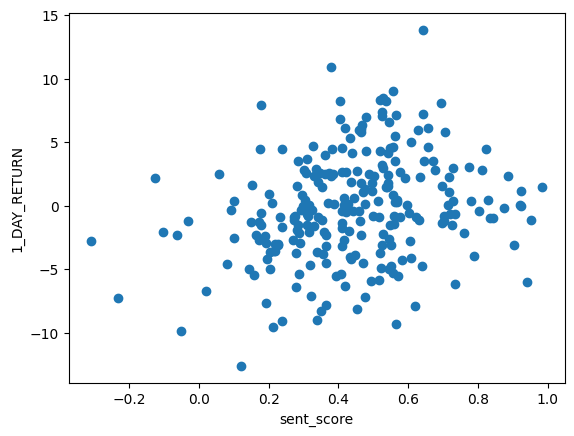

In [21]:
interval = "1_DAY_RETURN"
stock = "AMD"

stock_df = df[df["Stock Name"] == stock]
# m = corr_df[corr_df["Stock Name"] == stock][interval].values[0] / 100
plt.scatter(x=stock_df['sent_score'], y=stock_df[interval])
# plt.plot(tsla['sent_score'], m*tsla['sent_score'], color='red')
plt.ylabel(interval)
plt.xlabel('sent_score')
plt.show()

In [22]:
def sma(values, window):
    return values.rolling(window=window).mean()

def ema(values, window):
    return values.ewm(span=window, adjust=False).mean()

In [23]:
# export_df = df.rename(columns={
#     'Stock Name': 'stock_name',
#     'sent_score': 'sent_score',
#     'Company Name': 'company_name',
#     'Open': 'open',
#     'Adj Close': 'adj_close',
#     'Volume': 'volume',
#     '1_DAY_RETURN': 'one_day_return',
#     '2_DAY_RETURN': 'two_day_return',
#     '3_DAY_RETURN': 'three_day_return',
#     '7_DAY_RETURN': 'seven_day_return',
#     'VOLATILITY_2D': 'volatility_two_day',
#     'VOLATILITY_10D': 'volatility_ten_day',
#     'VOLATILITY_30D': 'volatility_thirty_day',
#     'Date': 'date',
#     'Tweet': 'tweet'
# })

# export_df.to_csv('stock_sentiment_data.csv', index=False)


In [24]:
intervals = ['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']
cols = ['Stock Name', 'Date', 'sent_score', 'Tweet'] + intervals
line_df = pd.DataFrame(columns=cols)

for ticker in tickers:
    stock_data = df[df['Stock Name'] == ticker].copy()
    stock_data.set_index("Date", inplace=True)

    # 14-day SMA of sentiment
    sent_sma = sma(stock_data['sent_score'], 14)
    norm_sentiment = sent_sma / sent_sma.abs().max()

    # Initialize merged DataFrame
    merged = pd.DataFrame({
        'Stock Name': ticker,
        'Date': stock_data.index,
        'sent_score': norm_sentiment,
        'Tweet': stock_data['Tweet']
    })

    # Add normalized SMA of each return interval
    for interval in intervals:
        price_sma = sma(stock_data[interval], 14)
        norm_price = price_sma / price_sma.abs().max()
        merged[interval] = norm_price.values

    line_df = pd.concat([line_df, merged], ignore_index=True)


C:\Users\brock\AppData\Local\Temp\ipykernel_21608\295369987.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  line_df = pd.concat([line_df, merged], ignore_index=True)


In [30]:
intervals = ['1_DAY_RETURN', '2_DAY_RETURN', '3_DAY_RETURN', '7_DAY_RETURN']
normalized_df = pd.DataFrame(columns=['Stock Name', 'Date', 'sent_score', 'Tweet'] + intervals)

for ticker in tickers:
    stock_data = df[df['Stock Name'] == ticker].copy()
    stock_data.set_index('Date', inplace=True)

    # Normalize sentiment
    sent = stock_data['sent_score']
    norm_sent = sent / sent.abs().max()

    temp_df = pd.DataFrame({
        'Stock Name': ticker,
        'Date': stock_data.index,
        'sent_score': norm_sent,
        'Tweet': stock_data['Tweet']

    })

    # Normalize each return interval
    for interval in intervals:
        returns = stock_data[interval]
        norm_return = returns / returns.abs().max()
        temp_df[interval] = norm_return.values  # Aligns by index

    normalized_df = pd.concat([normalized_df, temp_df], ignore_index=True)

C:\Users\brock\AppData\Local\Temp\ipykernel_21608\1463776132.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  normalized_df = pd.concat([normalized_df, temp_df], ignore_index=True)


In [ ]:
# export_df = normalized_df.rename(columns={
#     'Stock Name': 'stock_name',
#     'Date': 'date',
#     'sent_score': 'sent_score',
#     'Tweet': 'Tweet',
#     '1_DAY_RETURN': 'one_day_return',
#     '2_DAY_RETURN': 'two_day_return',
#     '3_DAY_RETURN': 'three_day_return',
#     '7_DAY_RETURN': 'seven_day_return'
# })

# export_df.to_csv('line_data.csv', index=False)

In [35]:
stock = "TSLA"
interval = "1_DAY_RETURN"
stock_data = line_df[line_df['Stock Name'] == stock]

stock_data.set_index("Date", inplace=True)

norm_sentiment = stock_data['sent_score']
norm_price = stock_data['1_DAY_RETURN']

Text(0.5, -0.1, 'Used simple moving average (14 day) for price to smoothen it.\nSentiment score is the average of tweets per day.\nNormalized both price and sentiment \n')

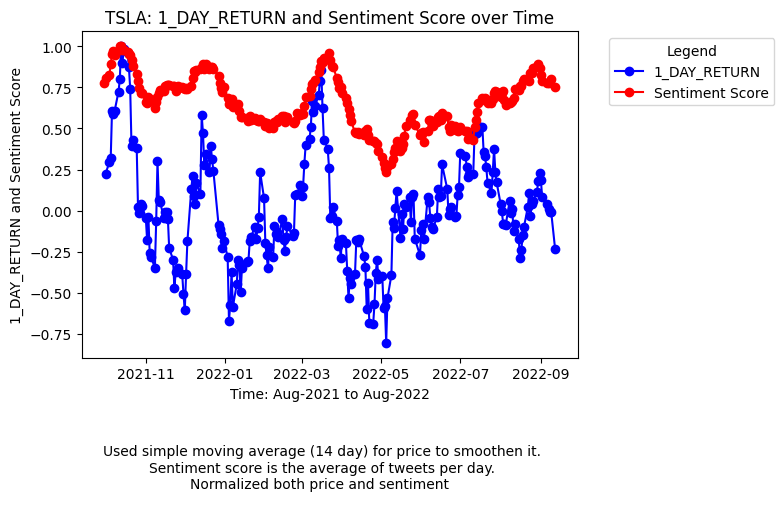

In [36]:
plt.plot(norm_price.index, norm_price.values, marker='o', linestyle='-', color='b', label=f'{interval}')
plt.plot(norm_sentiment.index, norm_sentiment.values, marker='o', linestyle='-', color='r', label='Sentiment Score')
plt.xlabel('Time: Aug-2021 to Aug-2022')
plt.ylabel(f'{interval} and Sentiment Score')
plt.title(f'{stock}: {interval} and Sentiment Score over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')
plt.subplots_adjust(bottom=0.2) 
plt.figtext(0.5, -0.1,
    'Used simple moving average (14 day) for price to smoothen it.\n'
    'Sentiment score is the average of tweets per day.\n'
    'Normalized both price and sentiment \n',
    wrap=True, horizontalalignment='center', fontsize=10)